<a href="https://colab.research.google.com/github/Bassu1011/Bike-Sharing-Demand_Prediction-Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#import required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
# import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing file and converting it into dataframe
file='/content/drive/MyDrive/bike sharing demand prediction/SeoulBikeData.csv'
csv=pd.read_csv(file,encoding='ISO-8859-1')
df=pd.DataFrame(csv)

In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.head() #to get first five rows of the dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail() #to get last five rows of the datset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.shape #shape of the datset

(8760, 14)

In [8]:
#to get summary of the datset
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
#to check the information of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
#finding the null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###**Observation :** There is no null values in the datset 

In [11]:
#converting the date column into year, day, month, weekday column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df["Day"] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Weekday'] = pd.DatetimeIndex(df['Date']).weekday

In [12]:
df.shape

(8760, 18)

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [14]:
#getting unique values of weeek
display(df['Weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

Weekday is in range 0-6 so we make it in normal 1-7

##**EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory data analysis is an statistical way of understanding the data which is usually done in a visual way.The graphs plotted in explotary data analysis are for better understanding of data to the analyst.

Since we have to predict the number of bikes that will be rented, the best way to begin is with the variable to predict, "Rented Bike Count"

In [15]:
#creating data frame with year, month, day, weekday and rented bike count
Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Weekday']).sum()).reset_index().sort_values("Weekday",ascending=True)

##**RENTED BIKE COUNT PER YEAR**

In [16]:
Rented_bike_per_year

,Year,Rented Bike Count
0,2017,185330
1,2018,5986984


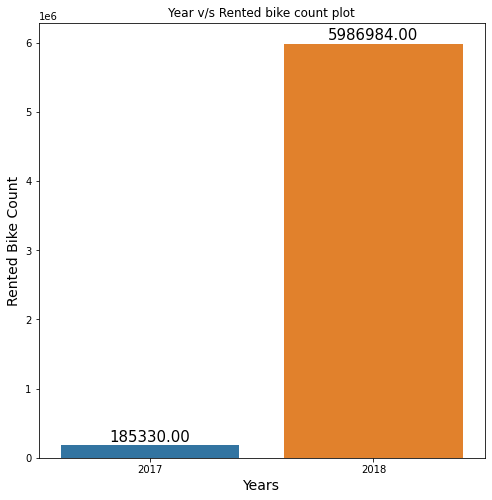

In [17]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_year['Year'] , y=Rented_bike_per_year['Rented Bike Count'])
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Years", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("Year v/s Rented bike count plot")
 
# Finally showing the plot
plt.show()

###**Observation**

As compared to year 2017 and 2018 bike rent was much less in the year 2017,  because of the company established in the same year. And after one year buisiness got accelarated

##**RENTED BIKE COUNT PER MONTH**

In [18]:
Rented_bike_per_month

,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


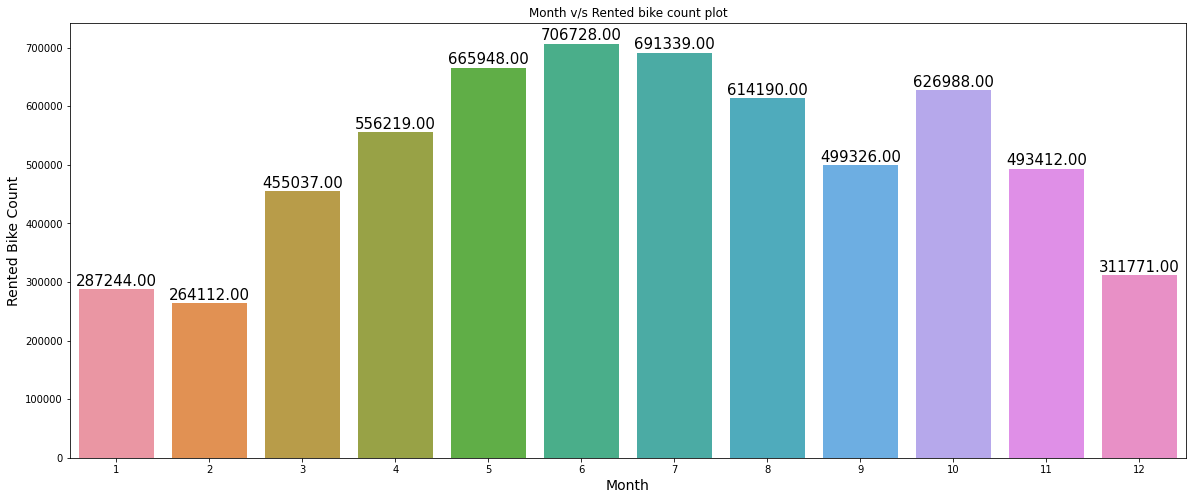

In [19]:
# Defining the plot size
plt.figure(figsize=(20, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_month['Month'] , y=Rented_bike_per_month['Rented Bike Count']) 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Month", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("Month v/s Rented bike count plot")
 
# Finally showing the plot
plt.show()

###**OBSERVATION:** 
Here we can see in 6th month or in june the rented bike count is 706728 which is highest and in 2nd month or in feb the count was lowest which is 264112.

##**RENTED BIKE COUNT PER DAY**

In [20]:
Rented_bike_per_Day

,Day,Rented Bike Count
0,1,64062
1,2,53694
2,3,117813
3,4,170431
4,5,235021
5,6,371295
6,7,272954
7,8,247818
8,9,335006
9,10,210966


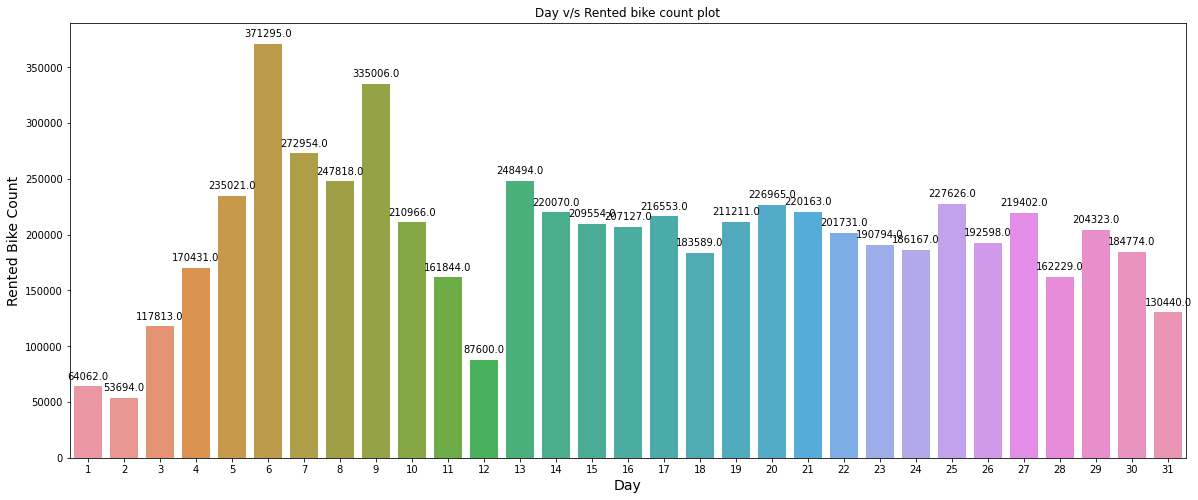

In [21]:
# Defining the plot size
plt.figure(figsize=(20, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Day['Day'] , y=Rented_bike_per_Day['Rented Bike Count']) 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Day", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("Day v/s Rented bike count plot")
 
# Finally showing the plot
plt.show()

###**OBSERVATION:** 
Here we can see the rented bike count is highest on 6th day of the month which is 371295 and lowest on 2nd day of the month which is 53694.


##**RENTED BIKE COUNT PER WEEKDAY**

In [22]:
Rented_bike_per_Weekday

,Weekday,Rented Bike Count
0,0,863563
1,1,862877
2,2,908871
3,3,928267
4,4,898966
5,5,911475
6,6,798295


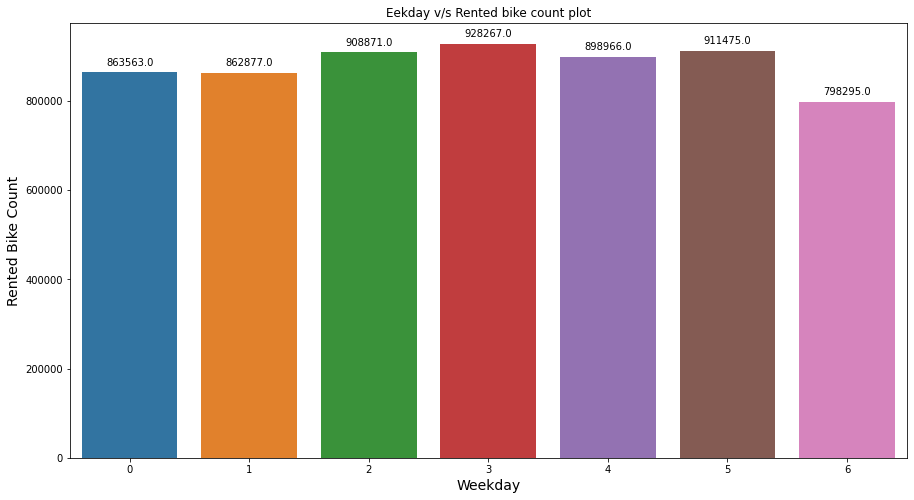

In [23]:
# Defining the plot size
plt.figure(figsize=(15, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=Rented_bike_per_Weekday['Weekday'] , y=Rented_bike_per_Weekday['Rented Bike Count']) 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Weekday", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("Eekday v/s Rented bike count plot")
 
# Finally showing the plot
plt.show()

###**OBSERVATION:** 
Here we can see on 4th day of week the rented bike count is 928267 which is highest.

##**RENTED BIKE COUNT WITH RESPECT TO TEMPERATURE**

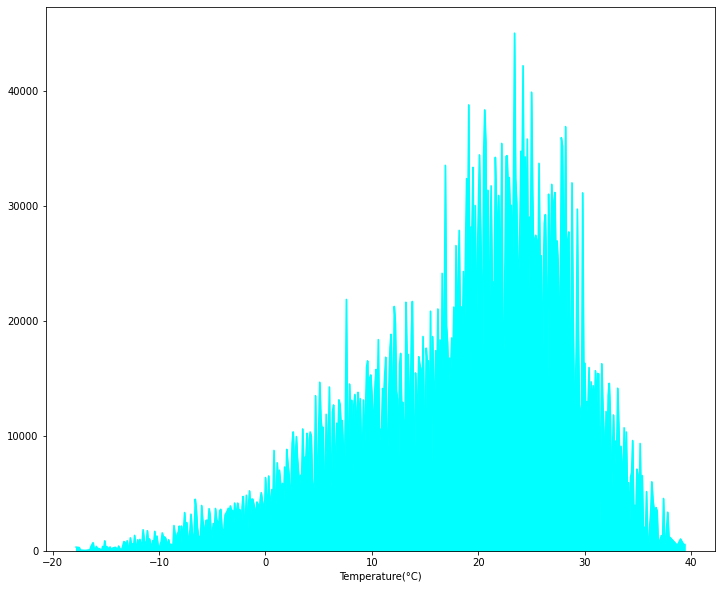

In [24]:
# Plot the graph between the temperature and rented bike counts
temp=df.groupby('Temperature(°C)')['Rented Bike Count'].sum()
temp.plot.area(color='cyan',figsize=(12, 10))

###**Observation:**


*   From the above graph, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.
*   From the above graph, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.



##**MONTHS OF BOTH YEAR 2017 AND 2018 AND RENTED BIKE COUNT**

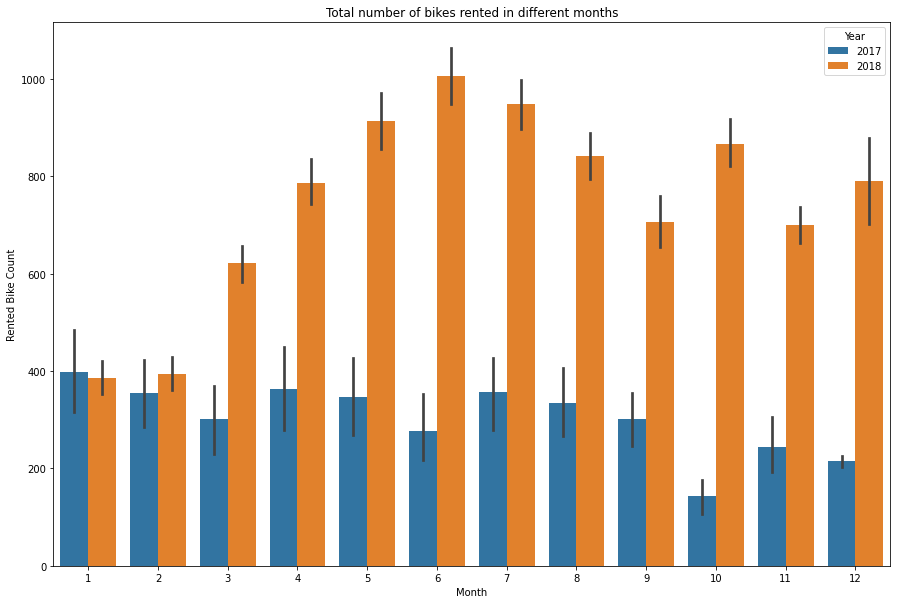

In [25]:
#creating dataframe with months of both year 2017 and 2018 and rented bike count
df.groupby(['Year','Month']).agg({'Rented Bike Count':['sum']}).reset_index()

#plotting graph
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data =df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()


###**OBSERVATION:**

*   There's is a whooping increase in number of bike rents in year 2018.
*   In the last month the demand decreases in 2018 but increases in it seen to be increasing in the end of 2017.
*   It is like this because, in 2017 the demand is taking off and we can see the pattern as it is still inceasing in the beginning months of 2018.
*   There is a decline in the end of the year. This could be repercussions of winter season as well.


In [26]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Day', 'Month', 'Weekday'],
      dtype='object')

In [27]:
#Extracting unique seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [28]:
#adding temperature and dew point temperature column 
df['Temperature_and_DP_Temp'] = [df['Temperature(°C)'][i]+df['Dew point temperature(°C)'][i] for i in range(len(df))]
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

##**RENTED BIKE COUNT PER SEASON**

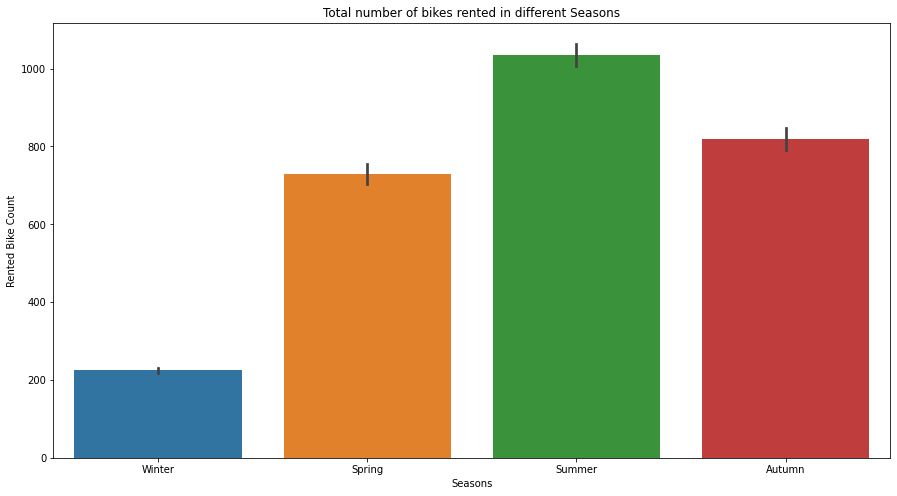

In [29]:
#seasons and rented bike count barplot
plt.figure(figsize=(15,8))
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.title("Total number of bikes rented in different Seasons")
plt.show()

##**OBSERVATION**: 
Here with pie and bar plot we can say in summer the rented bike count was high as compared to other seasons and lowest in winter season. This is because when temperature decreases amount of snowfall increases due to which people avoid getting out that is the reason in summer rented bike count increases.

##**RENTED BIKE COUNT ON HOLIDAY AND ON NO HOLIDAY**

In [30]:
#creating dataframe with holiday and rented bike count
holiday_bike_count=pd.DataFrame(df.groupby('Holiday')['Rented Bike Count'].sum()).reset_index()

In [31]:
holiday_bike_count

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


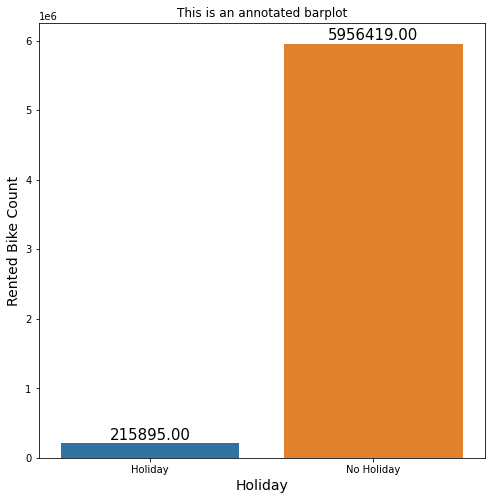

In [32]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=holiday_bike_count['Holiday'] , y=holiday_bike_count['Rented Bike Count'])
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Holiday", size=14)
 
# Setting the label for y-axis
plt.ylabel("Rented Bike Count", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Fianlly showing the plot
plt.show()

##**Or we can do the same with:**

In [33]:
#importing library
from plotnine import*

In [34]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Day',
       'Month', 'Weekday', 'Temperature_and_DP_Temp'],
      dtype='object')

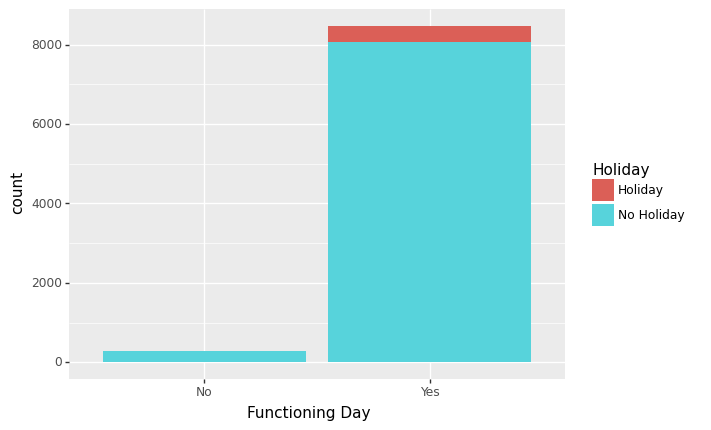

<ggplot: (8734740287993)>

In [35]:
#plotting graph
ggplot(df)+ aes('Functioning Day',fill='Holiday')+geom_bar()

**OBSERVATION:**

*   Here's an ironic insight, all the 
holidays are falling on the functioning Days.
*   Here we can say on no holiday the rented bike count is much more high than on holiday.





##**RENTED BIKE COUNT PER HOUR**

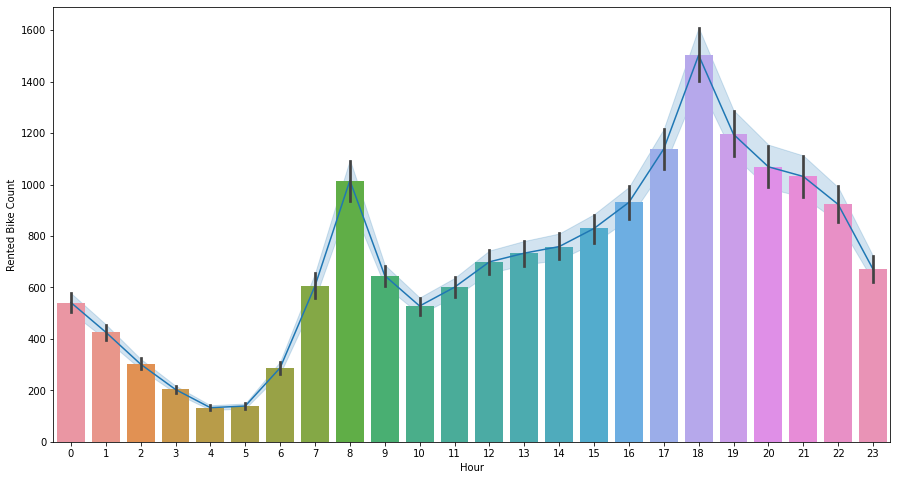

In [36]:
#plotting graph
plt.figure(figsize=(15,8))
sns.lineplot(df['Hour'],df['Rented Bike Count'])
sns.barplot(df['Hour'],df['Rented Bike Count'])

**OBSERVATION:** 
 
 Here with the graph we can say on 18th hour of the day there is a huge spike in the count of rented bike which is approx. 1600.

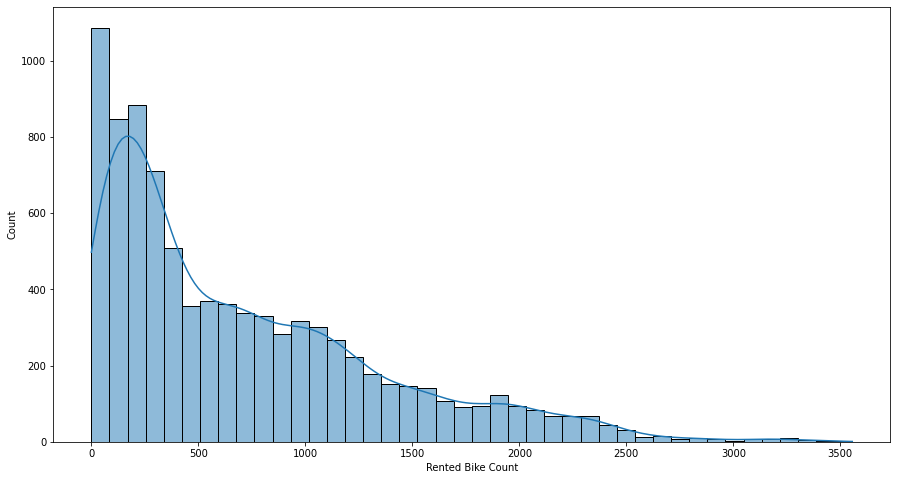

In [52]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=df, x="Rented Bike Count", kde= True,ax=ax)
plt.show()


**OBSERVATION:**



*   The data is positively skewed



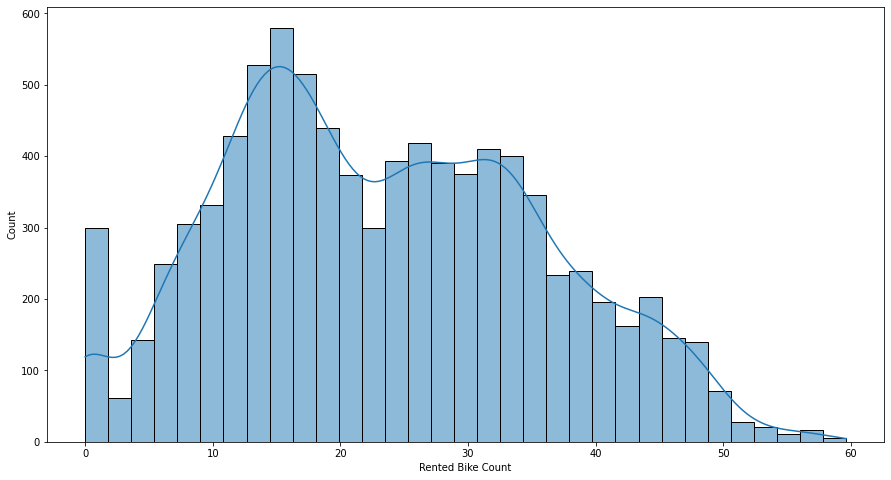

In [53]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=df, x=np.sqrt(df["Rented Bike Count"]), kde= True,ax=ax)
plt.show()

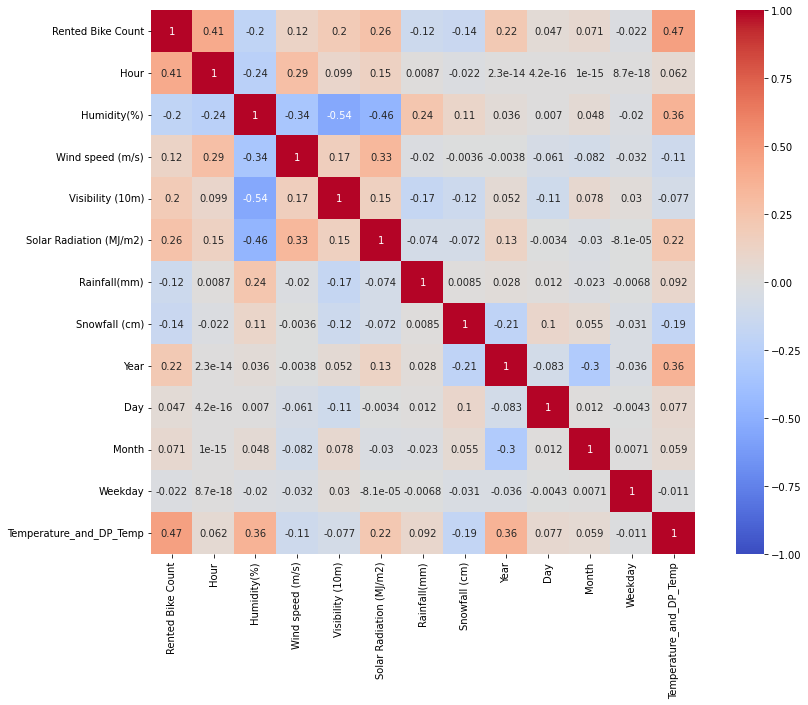

In [39]:
#plotting graph
plt.figure(figsize=(15,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

**OBSERVATION:**



*   Temperature and Dew point temperature are highly correlated. We can add them to make one single column




##**Pre-Processing**

There is a need of data pre-processing because the data may be incomplete or inconsistent or noisy. There are many ways to deal with un-processed data viz:

i)Data Cleaning: By this term we mean to fill the missing values in data, identifying and removing outliers in data, smoothningdata.

ii)Data Transformation: In this stage operations like normalization and aggrigation are performed.

iii)Data Reduction: In this stage the data set is modified such that the results produced by the model are almost the same but un neccesary values in dataset are removed.

iv)Data Integration: In this stage data is merged from different sources if needed , again redundancies are removed too.

v)Label Encoding: converting the categorical variables into numerical.

##**Label Encoding**

We will create DUMMY variables for 3 categorical variables 'Holiday', 'Functioning Day' and 'Seasons'.

Before creating dummy variables, we will have to convert them into 'category' data types.


In [40]:
#replacing no with 0 and yes with 1 and holiday with 1 no holiday with 0
bike_df = df.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0})

In [41]:
#creating dummy varaible for seasons
season_dummy = pd.get_dummies(bike_df['Seasons'])
for i in season_dummy.columns:
  bike_df[i]= season_dummy[i]
bike_df.drop('Seasons',axis='columns',inplace=True)
bike_df.head()

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,Weekday,Temperature_and_DP_Temp,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,2017,12,1,3,-22.8,0,0,0,1
1,2017-01-12,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,2017,12,1,3,-23.1,0,0,0,1
2,2017-01-12,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,2017,12,1,3,-23.7,0,0,0,1
3,2017-01-12,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,2017,12,1,3,-23.8,0,0,0,1
4,2017-01-12,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,2017,12,1,3,-24.6,0,0,0,1


In [42]:
# dropping date column as it is not required
bike_df.drop('Date', axis = 1 ,inplace= True)

In [43]:
#replacing month no. with mnth name
bike_df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec'),inplace= True)

In [44]:
#creating dummy varaible for month
month_dummy = pd.get_dummies(bike_df['Month'])
for i in month_dummy.columns:
  bike_df[i]= month_dummy[i]
bike_df.drop('Month',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,dec,feb,jan,july,june,mar,may,nov,oct,sept
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [45]:
bike_df.shape

(8760, 30)

In [46]:
bike_df['Holiday'].value_counts()#getting value count of holidays and no 

0    8328
1     432
Name: Holiday, dtype: int64

In [47]:
#creating dummy varaible for Holiday
Holiday_dummy = pd.get_dummies(bike_df['Holiday'])
for i in Holiday_dummy.columns:
  bike_df[i]= Holiday_dummy[i]
bike_df.drop('Holiday',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Year,...,jan,july,june,mar,may,nov,oct,sept,0,1
0,254,0,37,2.2,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
1,204,1,38,0.8,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
2,173,2,39,1.0,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
3,107,3,40,0.9,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0
4,78,4,36,2.3,2000,0.0,0.0,0.0,1,2017,...,1,0,0,0,0,0,0,0,1,0


In [48]:
bike_df['Functioning Day'].value_counts()#getting value count of functioning d

1    8465
0     295
Name: Functioning Day, dtype: int64

In [49]:
#creating dummy varaible for Holiday
Functioning_Day_dummy = pd.get_dummies(bike_df['Functioning Day'])
for i in Functioning_Day_dummy.columns:
  bike_df[i]= Functioning_Day_dummy[i]
bike_df.drop('Functioning Day',axis='columns',inplace=True)
bike_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Day,...,jan,july,june,mar,may,nov,oct,sept,0,1
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,...,1,0,0,0,0,0,0,0,0,1


In [51]:
bike_df.shape# final shape of dataframe after preprocessing

(8760, 30)